In [1]:
import pandas as pd
file1 = '/Users/wenshuiluo/work/total.xlsx'
data1 = pd.read_excel(file1,header=[1])
data1.head()

,来自IP,学号,姓名,性别,联系电话,政治面貌,原班级职务,社团名称和担任的职务,担任学生骨干名称
0,(山东-滨州),9181010E0201,毛睿,女,18851041454,共青团员,,NaN,院红会 副部长
1,(湖南-长沙),9181010E0222,刘睿,男,19825000917,共青团员,,air机器人工作室,NaN
2,(上海-上海),9181010E0419,陆天逸,男,19921178092,共青团员,,NaN,NaN
3,(广西-南宁),9181010E0423,潘海,男,19852853269,共青团员,,NaN,NaN
4,(陕西-西安),9181010E0605,陈晓东,男,13324598088,共青团员,,NaN,NaN


In [2]:
file2 = '/Users/wenshuiluo/work/12.30.xlsx'
data2 = pd.read_excel(file2)
data2.head()

,序号,提交答卷时间,所用时间,来源,来源详情,来自IP,1、姓名,2、学号,3、具体去向，每位同学仅选一项。
0,1,2021/12/28 12:00:46,29秒,微信,NaN,222.95.186.109(江苏-南京),罗文水,918106840738,4
1,2,2021/12/28 12:04:08,9秒,手机提交,直接访问,219.230.100.76(江苏-南京),林凯杰,918108320210,4
2,3,2021/12/28 12:04:10,20秒,手机提交,直接访问,223.104.150.81(江苏-扬州),蒋旭钊,918106840727,8
3,4,2021/12/28 12:04:10,19秒,手机提交,直接访问,222.95.235.181(江苏-南京),赵震,918106840453,4
4,5,2021/12/28 12:04:17,21秒,手机提交,直接访问,219.230.87.200(江苏-南京),王猛,918106840141,5


In [15]:
print(len(data2['1、姓名']))
set(list(data1['姓名'].dropna())+['余汉鸿']) - set(data2['1、姓名'])

53


{'刘睿', '林仕景', '毛睿', '王俊玺', '苏雯茜', '邢宇', '陆天逸', '陈宏宇'}

In [2]:
import numpy as np
a = np.asarray([[2,0,0],[1,1,0],[1,0,1]])
np.linalg.inv(a) @ np.asarray([2,2,5]).T

array([1., 1., 4.])

In [66]:
# using your file path
file_path = '/Users/wenshuiluo/Downloads/dataprocess_2.csv'
import pandas as pd
data = pd.read_csv(file_path)
grouped_data = data.groupby(['Stkcd']).apply(lambda x:x)
tmp = pd.Series([None]).append(grouped_data['Clpr'].diff().dropna().reset_index()['Clpr'] / grouped_data[:-1]['Clpr'])
grouped_data['gain_ratio'] = pd.DataFrame(tmp.reset_index()).iloc[:,1]
# using your file path
output_path = '/Users/wenshuiluo/Downloads/output.csv'
for i in range(1,len(grouped_data)):
    # set 'nan' for the first gain_ratio of every stock
    if grouped_data.iloc[i]['Stkcd']!=grouped_data.iloc[i-1]['Stkcd']:
        grouped_data.iloc[i,len(grouped_data.columns)-1]=None
grouped_data.iloc[0,len(grouped_data.columns)-1]=None
grouped_data.to_csv(output_path,index=False)

In [68]:
grouped_data.tail()

,Unnamed: 0,Unnamed: 0.1,Stkcd,Csrciccd1,Date,Clpr,Clpr1,Clpr2,Trdshr,yearMonth,Clpr_rolling12_avg,Clpr_rolling12_max,PTH_rolling12,gain_ratio
548598,555620,483099,900957,K,2021/8/31,0.607,0.6118,0.607,184000000.0,21-Aug,0.606000,0.732,0.827869,-0.0589147
548599,559635,483100,900957,K,2021/9/30,0.662,0.6673,0.662,184000000.0,21-Sep,0.618500,0.732,0.844945,0.0906096
548600,563637,483101,900957,K,2021/10/29,0.635,0.6401,0.635,184000000.0,21-Oct,0.628500,0.732,0.858607,-0.0407855
548601,567686,483102,900957,K,2021/11/30,0.609,0.6138,0.609,184000000.0,21-Nov,0.635750,0.732,0.868511,-0.0409449
548602,571760,483103,900957,K,2021/12/31,0.631,0.6360,0.631,184000000.0,21-Dec,0.646417,0.732,0.883083,0.0361248


In [41]:
len(grouped_data['收益率'].dropna())

548559

In [24]:
grouped_data.iloc[0]

Unnamed: 0                      3
Unnamed: 0.1                  264
Stkcd                           2
Csrciccd1                       K
Date                    2000/1/28
Clpr                        10.55
Clpr1                     89.0775
Clpr2                      0.5828
Trdshr                3.98712e+08
yearMonth                  Jan-00
Clpr_rolling12_avg          10.55
Clpr_rolling12_max          10.55
PTH_rolling12                   1
收益率                      0.405687
Name: 0, dtype: object

In [18]:
grouped_data['收益率'] = grouped_data['Clpr'].diff().dropna() / grouped_data['Clpr']

In [17]:
grouped_data.head()
for i in range(1,len(grouped_data)) :
    if grouped_data[i]['Clpr'] != grouped_data[i-1]['Clpr']:
        grouped_data[i]

,Unnamed: 0,Unnamed: 0.1,Stkcd,Csrciccd1,Date,Clpr,Clpr1,Clpr2,Trdshr,yearMonth,Clpr_rolling12_avg,Clpr_rolling12_max,PTH_rolling12,收益率
0,3,264,2,K,2000/1/28,10.55,89.0775,0.5828,398711877.0,Jan-00,10.5500,10.55,1.000000,NaN
1,977,265,2,K,2000/2/29,14.83,125.2152,0.8193,398711877.0,Feb-00,12.6900,14.83,0.855698,0.288604
2,1944,266,2,K,2000/3/31,12.69,107.1464,0.7011,398711877.0,Mar-00,12.6900,14.83,0.855698,-0.168637
3,2959,267,2,K,2000/4/28,12.48,105.3733,0.6895,398711877.0,Apr-00,12.6375,14.83,0.852158,-0.016827
4,3911,268,2,K,2000/5/31,11.89,100.3917,0.6569,398711877.0,May-00,12.4880,14.83,0.842077,-0.049622


In [19]:
grouped_data.head()

,Unnamed: 0,Unnamed: 0.1,Stkcd,Csrciccd1,Date,Clpr,Clpr1,Clpr2,Trdshr,yearMonth,Clpr_rolling12_avg,Clpr_rolling12_max,PTH_rolling12,收益率
0,3,264,2,K,2000/1/28,10.55,89.0775,0.5828,398711877.0,Jan-00,10.5500,10.55,1.000000,NaN
1,977,265,2,K,2000/2/29,14.83,125.2152,0.8193,398711877.0,Feb-00,12.6900,14.83,0.855698,0.288604
2,1944,266,2,K,2000/3/31,12.69,107.1464,0.7011,398711877.0,Mar-00,12.6900,14.83,0.855698,-0.168637
3,2959,267,2,K,2000/4/28,12.48,105.3733,0.6895,398711877.0,Apr-00,12.6375,14.83,0.852158,-0.016827
4,3911,268,2,K,2000/5/31,11.89,100.3917,0.6569,398711877.0,May-00,12.4880,14.83,0.842077,-0.049622


In [13]:
grouped_data.tail()

,Unnamed: 0,Unnamed: 0.1,Stkcd,Csrciccd1,Date,Clpr,Clpr1,Clpr2,Trdshr,yearMonth,Clpr_rolling12_avg,Clpr_rolling12_max,PTH_rolling12,收益率
548598,555620,483099,900957,K,2021/8/31,0.607,0.6118,0.607,184000000.0,21-Aug,0.606000,0.732,0.827869,0.607
548599,559635,483100,900957,K,2021/9/30,0.662,0.6673,0.662,184000000.0,21-Sep,0.618500,0.732,0.844945,0.662
548600,563637,483101,900957,K,2021/10/29,0.635,0.6401,0.635,184000000.0,21-Oct,0.628500,0.732,0.858607,0.635
548601,567686,483102,900957,K,2021/11/30,0.609,0.6138,0.609,184000000.0,21-Nov,0.635750,0.732,0.868511,0.609
548602,571760,483103,900957,K,2021/12/31,0.631,0.6360,0.631,184000000.0,21-Dec,0.646417,0.732,0.883083,0.631


0         0.405687
1        -0.144302
2        -0.016548
3        -0.047276
4         0.136249
            ...   
548597   -0.058915
548598    0.090610
548599   -0.040785
548600   -0.040945
548601    0.036125
Name: Clpr, Length: 548602, dtype: float64

In [4]:
len(grouped_data[:-2])

548601

Text(0.5, 1.0, 'Openset-0% & Asymmetric-40%')

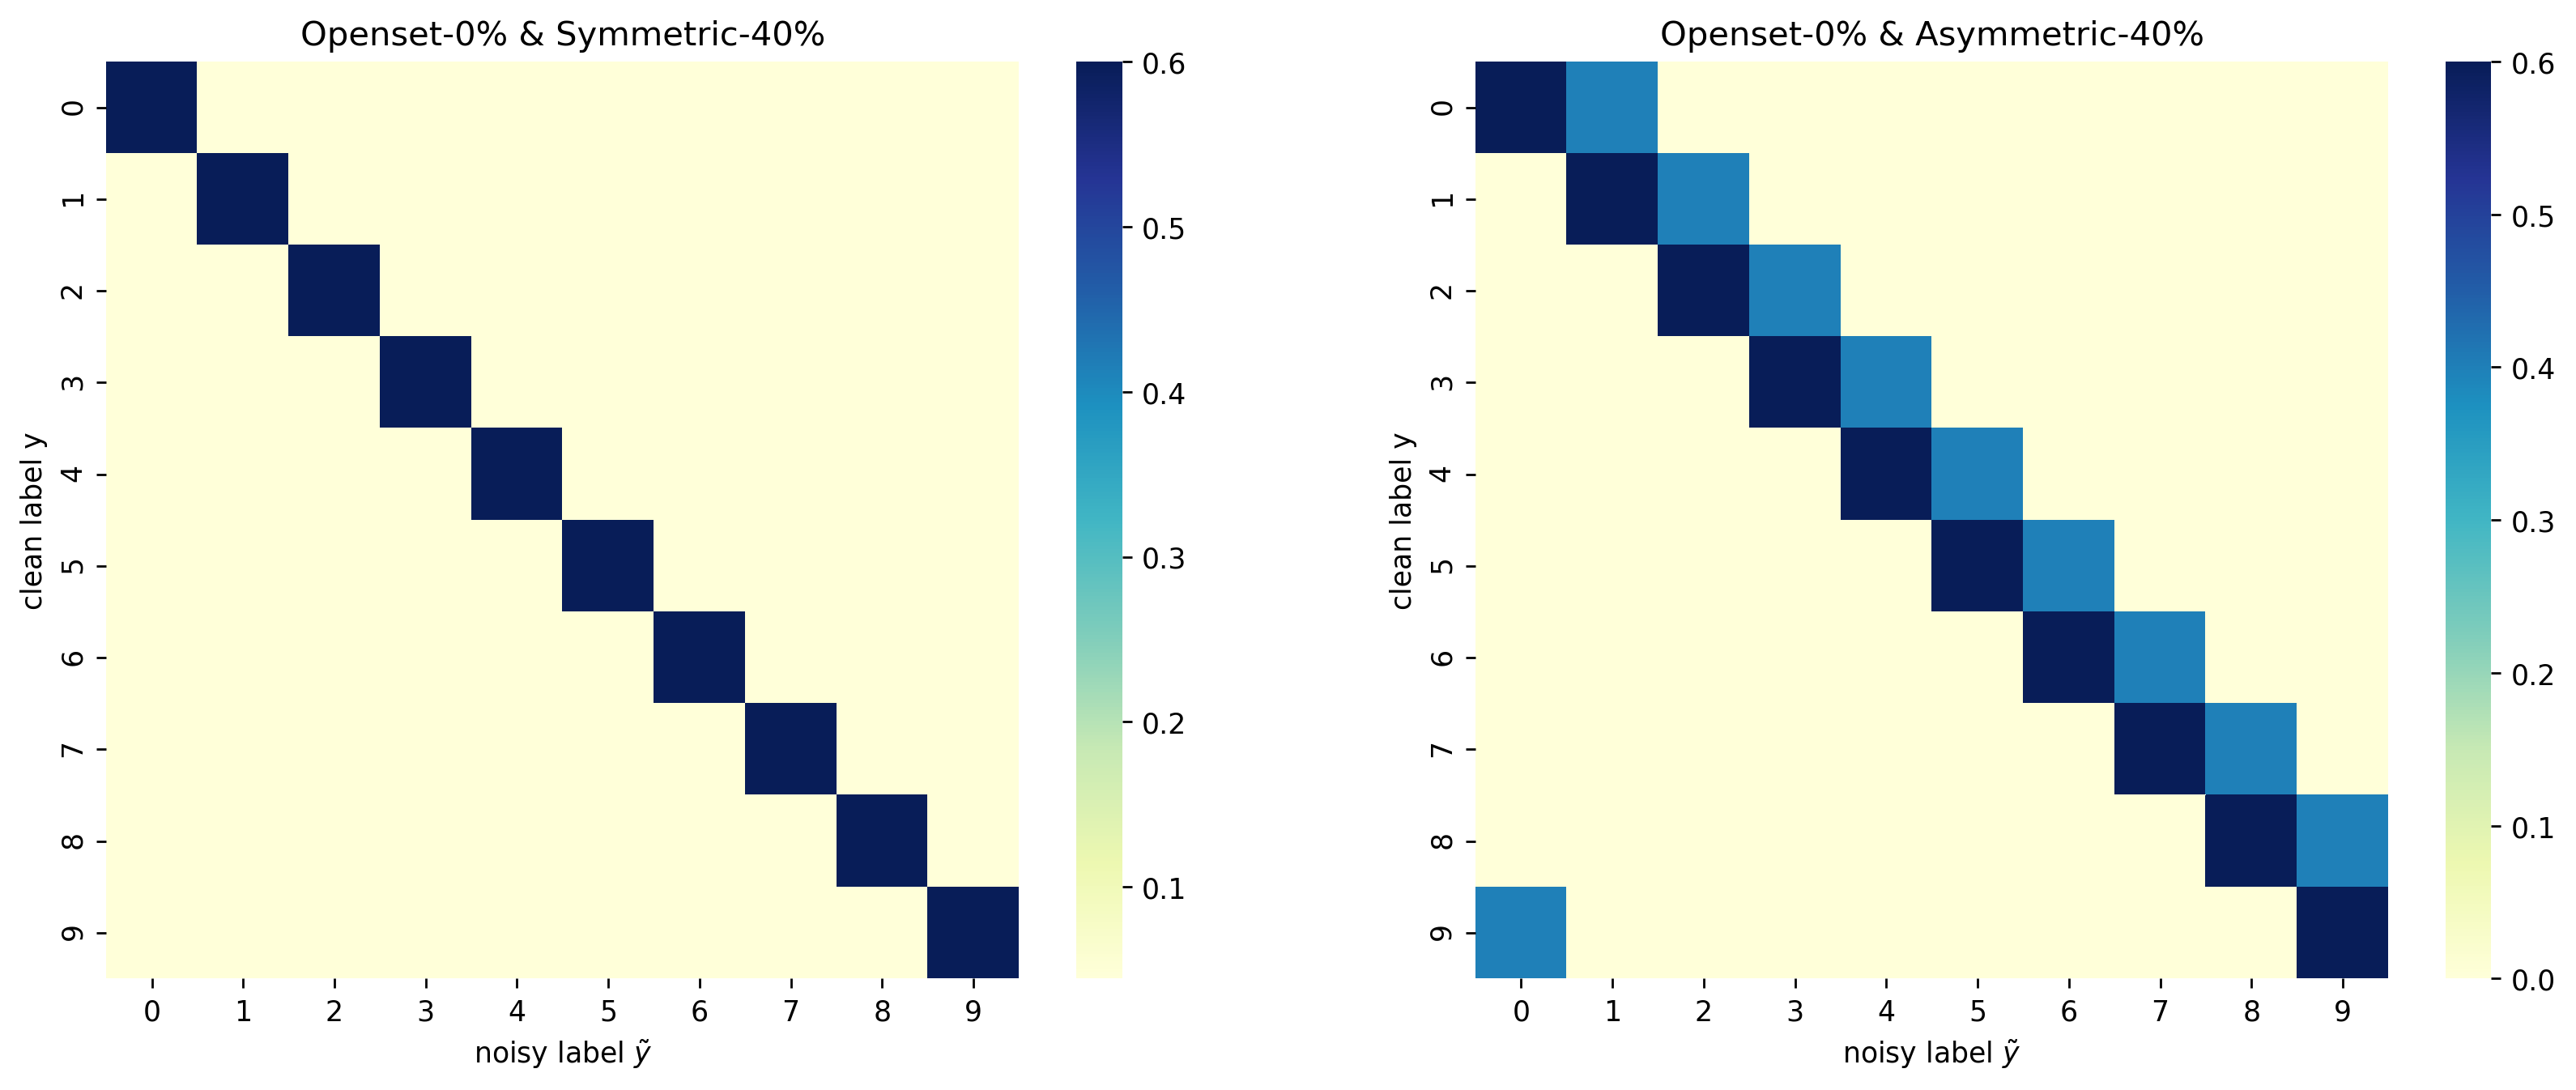

In [33]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='Song'
plt.rcParams['axes.unicode_minus'] = False

noise_rate = 0.4
classes = 10
transition = np.zeros((10,10))
for i in range(transition.shape[0]):
    transition[i,i]=1-noise_rate
    for j in range(transition.shape[1]):
        if i != j:
            transition[i,j]=noise_rate / (transition.shape[1] - 1)
plt.figure(figsize=(16,6),dpi=250)
plt.subplot(1,2,1)
sns.heatmap(transition, annot=False, cmap="YlGnBu")
plt.xlabel('noisy label $\\tilde{y}$')
plt.ylabel('clean label y')
plt.title('Openset-0% & Symmetric-40%')

transition_2 = np.zeros((10,10))
for i in range(transition.shape[0]):
    transition_2[i,i]=1-noise_rate
    transition_2[i, (i + 1) % transition_2.shape[0]] = noise_rate
plt.subplot(1,2,2)
sns.heatmap(transition_2, annot=False, cmap="YlGnBu")
plt.xlabel('noisy label $\\tilde{y}$')
plt.ylabel('clean label y')
plt.title('Openset-0% & Asymmetric-40%')



Text(0.5, 1.0, 'Openset-20% & Asymmetric-40%')

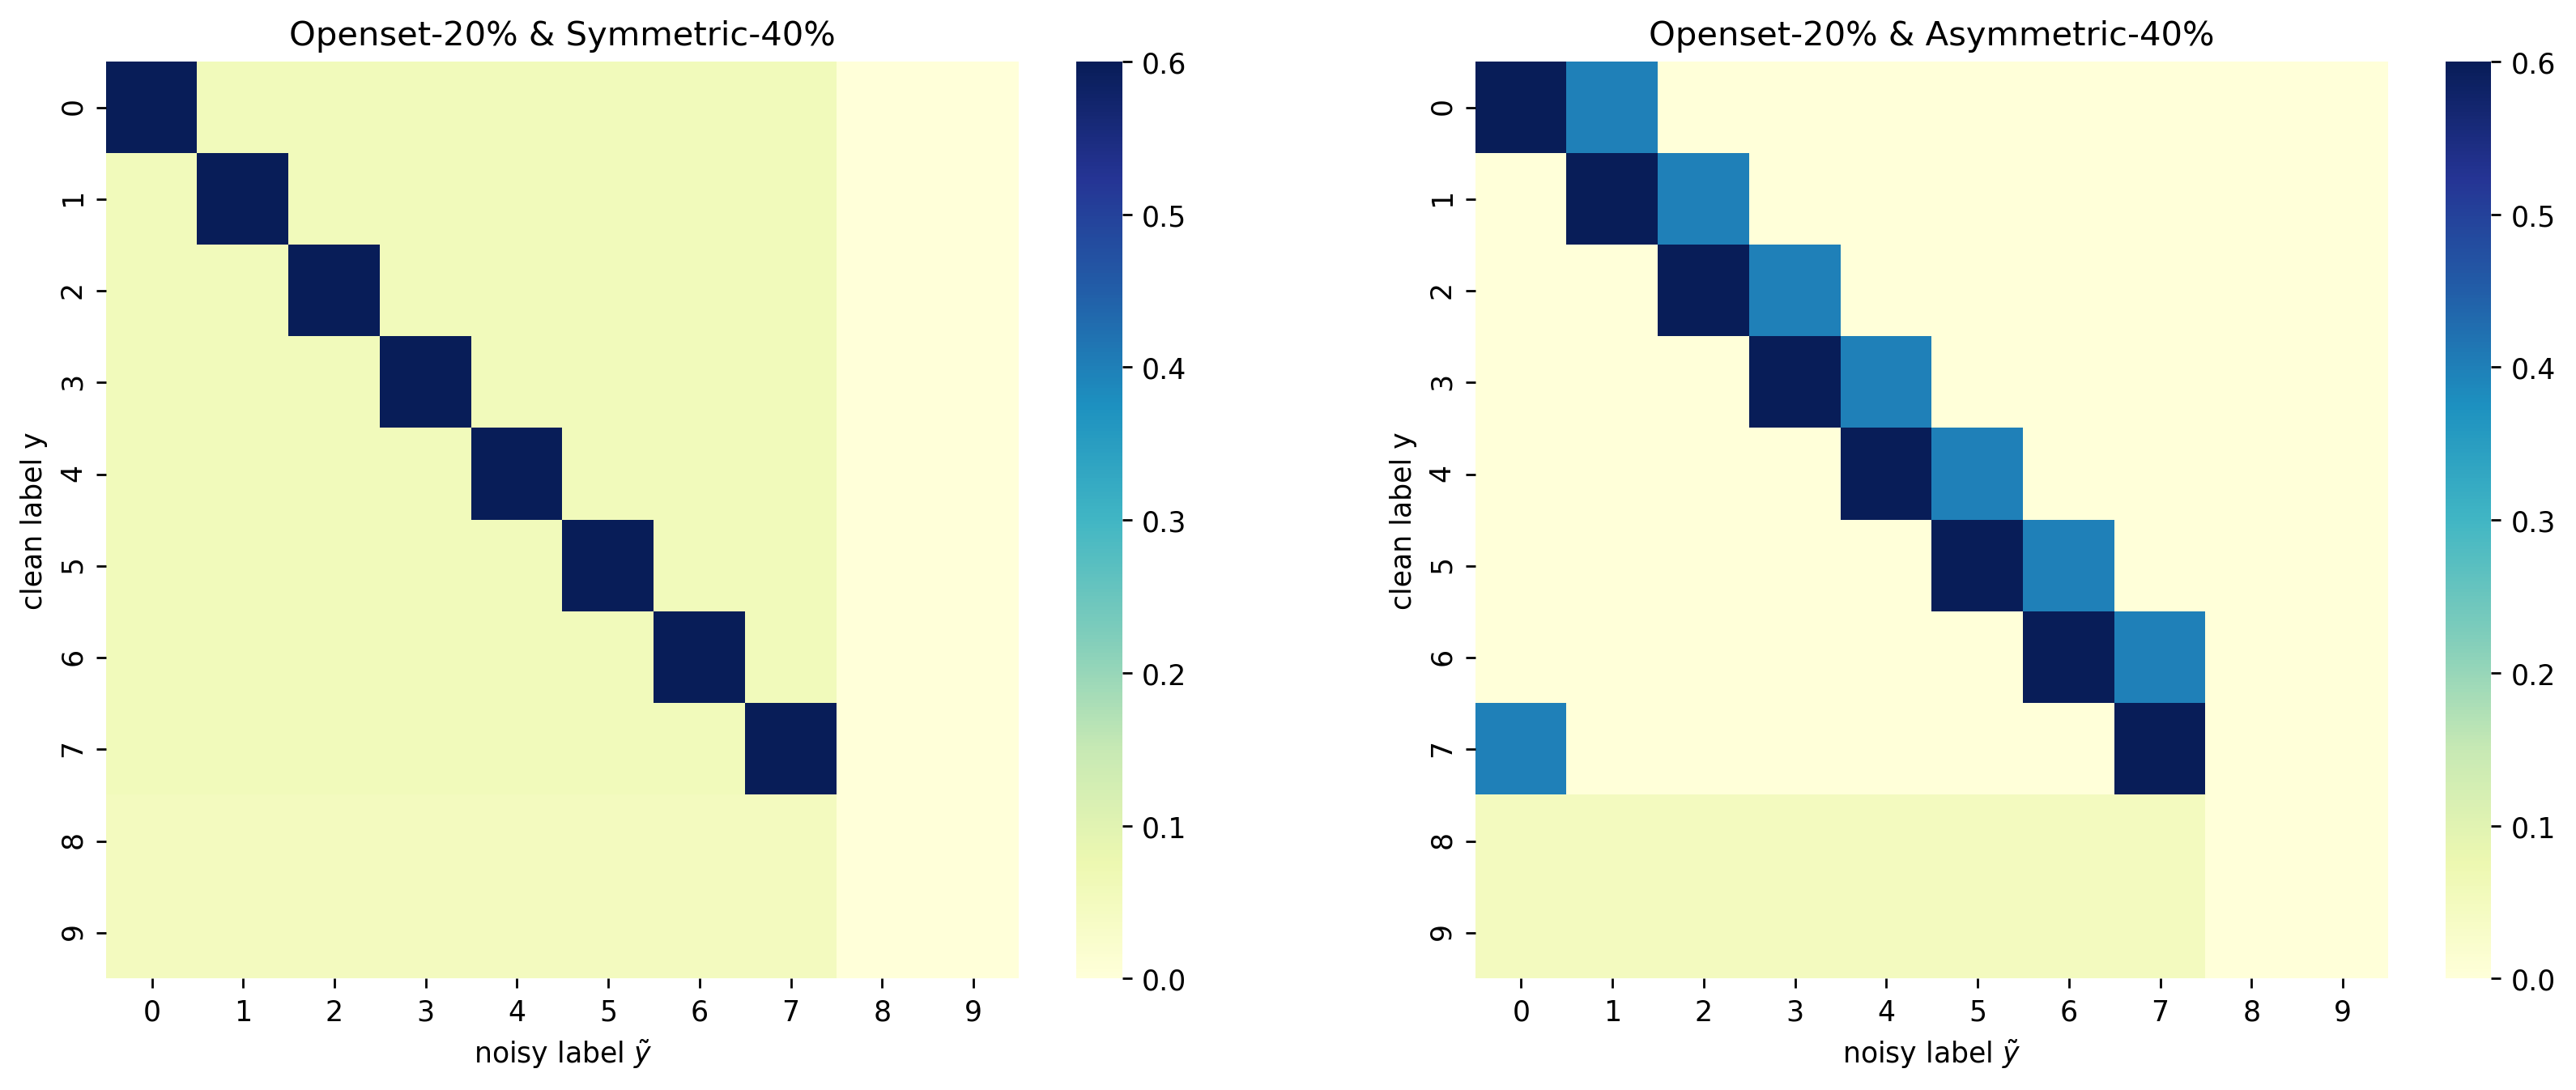

In [34]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif']='Song'
plt.rcParams['axes.unicode_minus'] = False


def confusion_matrix(y_true, y_pred, labels=None):
    n = len(labels)
    labels_dict = {label: i for i, label in enumerate(labels)}
    res = np.zeros([n, n], dtype=np.int32)
    for gold, predict in zip(y_true, y_pred):
        res[labels_dict[gold]][labels_dict[predict]] += 1

    df = pd.DataFrame(res, index=labels, columns=labels)
    sns.heatmap(df, annot=True, fmt='d')
    plt.savefig("./confusion_matrix.jpg")
    plt.show()

noise_rate = 0.4
o_rate = 0.2
classes = 10
transition = np.zeros((10,10))
id = int(transition.shape[0] * (1-o_rate))
for i in range(id):
    transition[i,i]=1-noise_rate
    for j in range(id):
        if i==j:
            continue
        transition[i,j]=noise_rate / (id - 1)
for i in range(id, transition.shape[0]):
    for j in range(id):
        transition[i,j]=noise_rate / id
plt.figure(figsize=(16,6),dpi=250)
plt.subplot(1,2,1)
sns.heatmap(transition, annot=False, cmap="YlGnBu")
plt.xlabel('noisy label $\\tilde{y}$')
plt.ylabel('clean label y')
plt.title('Openset-20% & Symmetric-40%')

transition_2 = np.zeros((10,10))
for i in range(id):
    transition_2[i,i]=1-noise_rate
    transition_2[i,(i+1)%id]=noise_rate
for i in range(id, transition.shape[0]):
    for j in range(id):
        transition_2[i,j]=noise_rate / id
plt.subplot(1,2,2)
sns.heatmap(transition_2, annot=False, cmap="YlGnBu")
plt.xlabel('noisy label $\\tilde{y}$')
plt.ylabel('clean label y')
plt.title('Openset-20% & Asymmetric-40%')


# y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]  # 真实
# y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]  # 预测
# labels = ["ant", "bird", "cat"]

# confusion_matrix(y_true, y_pred, labels)


In [1]:
# Import packages.
import cvxpy as cp
import numpy as np

# Generate a random non-trivial quadratic program.
m = 15
n = 10
p = 5
np.random.seed(1)
P = np.random.randn(n, n)
P = P.T @ P
q = np.random.randn(n)
G = np.random.randn(m, n)
h = G @ np.random.randn(n)
A = np.random.randn(p, n)
b = np.random.randn(p)

# Define and solve the CVXPY problem.
x = cp.Variable(n)
prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(x, P) + q.T @ x),
                 [G @ x <= h,
                  A @ x == b])
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)
print("A dual solution corresponding to the inequality constraints is")
print(prob.constraints[0].dual_value)


The optimal value is 86.89141585569917
A solution x is
[-1.68244521  0.29769913 -2.38772183 -2.79986015  1.18270433 -0.20911897
 -4.50993526  3.76683701 -0.45770675 -3.78589638]
A dual solution corresponding to the inequality constraints is
[ 0.          0.          0.          0.          0.         10.45538054
  0.          0.          0.         39.67365045  0.          0.
  0.         20.79927156  6.54115873]


Text(0.5, 1.0, 'structure matrix')

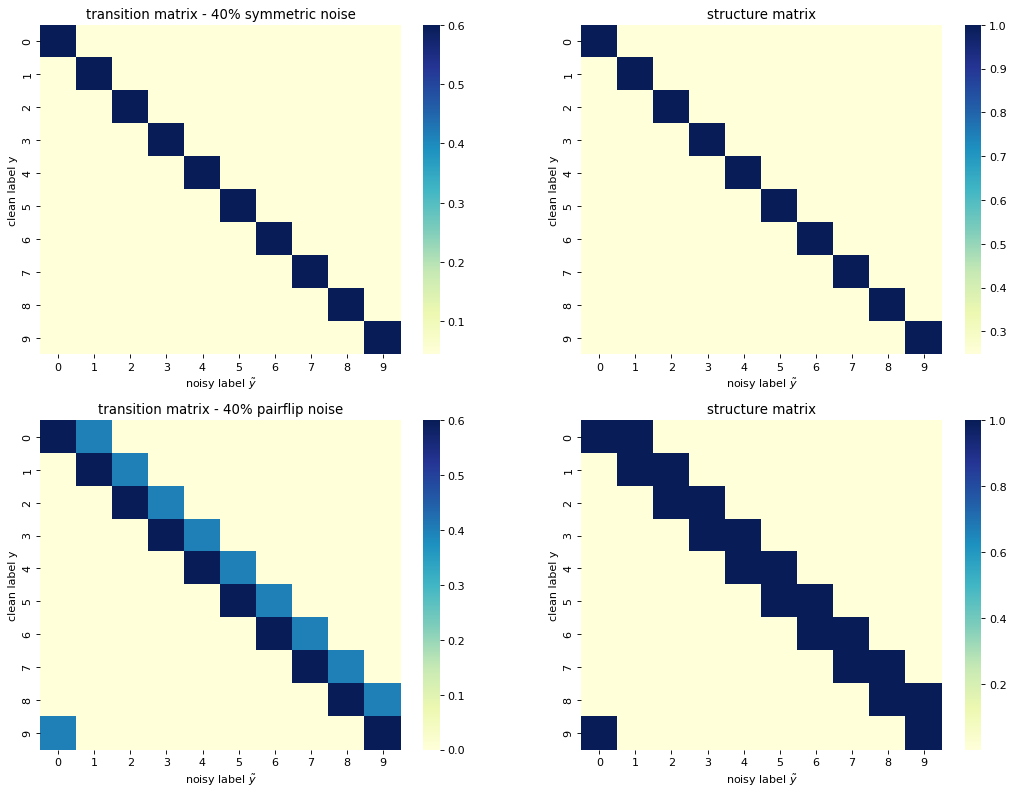

In [6]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='Song'
plt.rcParams['axes.unicode_minus'] = False

def f(s, alpha = 0.05, beta = 0.005):
    return 1  / (1 + np.exp(-(s - alpha) / beta) )

noise_rate = 0.4
classes = 10
transition = np.zeros((10,10))
for i in range(transition.shape[0]):
    transition[i,i]=1-noise_rate
    for j in range(transition.shape[1]):
        if i != j:
            transition[i,j]=noise_rate / (transition.shape[1] - 1)

plt.figure(figsize=(16,12),dpi=80)
plt.subplot(2,2,1)
sns.heatmap(transition, annot=False, cmap="YlGnBu")
plt.xlabel('noisy label $\\tilde{y}$')
plt.ylabel('clean label y')
plt.title('transition matrix - 40% symmetric noise')
plt.subplot(2,2,2)
sns.heatmap(f(transition), annot=False, cmap="YlGnBu")
plt.xlabel('noisy label $\\tilde{y}$')
plt.ylabel('clean label y')
plt.title('structure matrix')



transition_2 = np.zeros((10,10))
for i in range(transition.shape[0]):
    transition_2[i,i]=1-noise_rate
    transition_2[i, (i + 1) % transition_2.shape[0]] = noise_rate
plt.subplot(2,2,3)
sns.heatmap(transition_2, annot=False, cmap="YlGnBu")
plt.xlabel('noisy label $\\tilde{y}$')
plt.ylabel('clean label y')
plt.title('transition matrix - 40% pairflip noise')
plt.subplot(2,2,4)
sns.heatmap(f(transition_2), annot=False, cmap="YlGnBu")
plt.xlabel('noisy label $\\tilde{y}$')
plt.ylabel('clean label y')
plt.title('structure matrix')

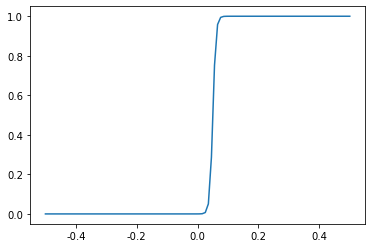

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='Song'
plt.rcParams['axes.unicode_minus'] = False
x = np.linspace(-0.5,0.5,100)
def f(s, alpha = 0.05, beta = 0.005):
    return 1  / (1 + np.exp(-(s - alpha) / beta) )

plt.plot(x,f(x))

In [49]:
from turtle import backward
import torch
import torch.nn as nn
import os
import shutil
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import numpy as np
from torch.autograd import Variable, grad
from json import dump
import random
from numpy.testing import assert_array_almost_equal
from tqdm import tqdm
import scipy
def init_seeds(seed=0):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    cudnn.deterministic = True
    cudnn.benchmark = True
    torch.cuda.empty_cache()
init_seeds(0)
trans = nn.Linear(5,10)
print(trans.weight.shape,trans.weight.data)
trans2 = nn.Linear(10, 1)
print(trans2.weight.shape, trans2.weight.data)
trans2.weight.data.copy_(torch.ones_like(trans2.weight.data))
input = torch.ones((1,5), requires_grad=True) * 10
print(input.requires_grad)
print('trans.weight.grad', trans.weight.grad)

intermedia = trans(input)
intermedia.data.copy_(torch.ones_like(intermedia.data) * 10)
res = trans2(intermedia).view(-1)[0]
res.backward(retain_graph=True)
print('trans2.weight.grad',trans2.weight.grad)
print('trans.weight.grad', trans.weight.grad)
# print('input.grad', input.grad)
print(intermedia.data)
print(res.data.item())

torch.Size([10, 5]) tensor([[-0.0033,  0.2399, -0.3681, -0.3291, -0.1722],
        [ 0.1199, -0.0089,  0.3546, -0.0397,  0.1183],
        [-0.1352, -0.0879, -0.4272, -0.2962, -0.1844],
        [ 0.0166,  0.1768,  0.2683, -0.3032, -0.1947],
        [ 0.1624,  0.3714, -0.0920,  0.3347, -0.0721],
        [ 0.0473,  0.4049, -0.4149, -0.2815, -0.1132],
        [-0.1743,  0.3864, -0.2899, -0.2059, -0.3124],
        [-0.4188, -0.2611,  0.3844,  0.1996,  0.2168],
        [ 0.0235, -0.2293,  0.0757, -0.4176, -0.3231],
        [-0.2306,  0.2822,  0.2622, -0.1983, -0.0161]])
torch.Size([1, 10]) tensor([[ 0.1431,  0.1272, -0.1873,  0.0955,  0.1736, -0.0399,  0.0121,  0.0733,
          0.1962,  0.3036]])
True
trans.weight.grad None
trans2.weight.grad tensor([[10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]])
trans.weight.grad tensor([[10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.]

In [5]:
import torch.nn as nn
nn.Parameter(torch.zeros((3,)), requires_grad=True)

Parameter containing:
tensor([0., 0., 0.], requires_grad=True)